In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_index=pd.read_csv("economic_dataset.csv")

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
# Drop columns which are not required
df_index.drop(columns=["Unnamed: 0","year","month"], axis=1,inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [15]:
# Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

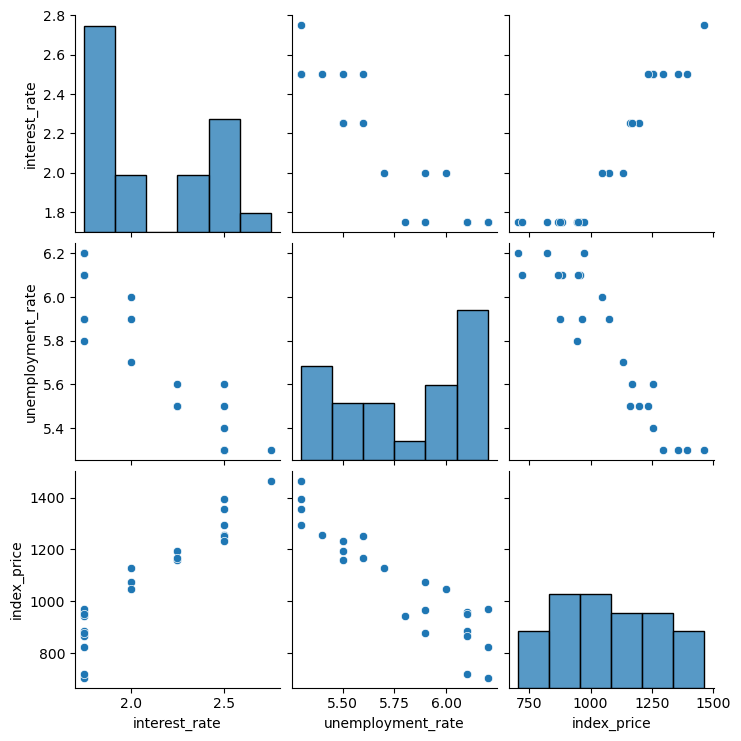

In [17]:
## Visualization
import seaborn as sns
sns.pairplot(df_index)

In [19]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

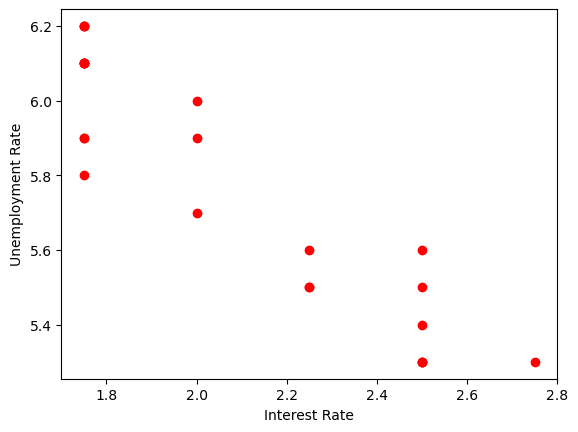

In [30]:
## Visualize the datapoints
plt.scatter(df_index['interest_rate'],df_index["unemployment_rate"],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [32]:
# Independent and dependent features
# X=df_index[['interest_rate','unemployment_rate']]
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [38]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [40]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [34]:
X.shape

(24, 2)

In [36]:
y.shape

(24,)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

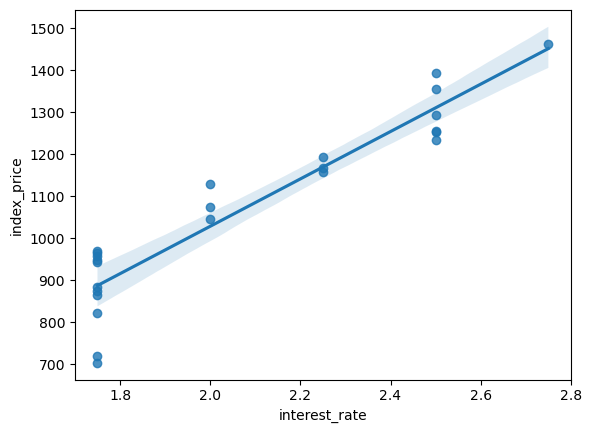

In [50]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

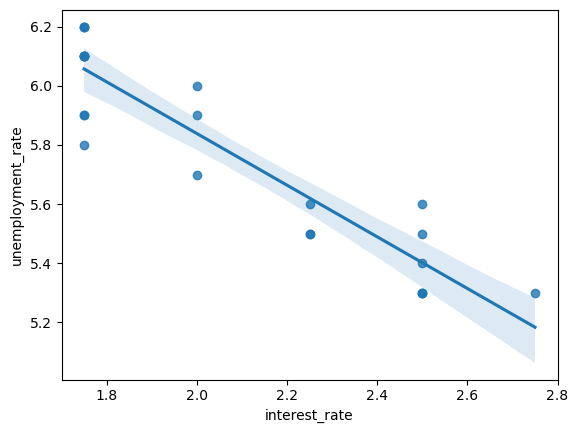

In [52]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [58]:
X_test=scaler.transform(X_test) # we should use transform to avoid Data leakage

In [60]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [62]:
regression=LinearRegression()

In [66]:
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
from sklearn.model_selection import cross_val_score

In [70]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [105]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="cross_val.png", width=500, height=500) 

In [72]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [74]:
np.mean(validation_score)

-5914.828180162388

In [76]:
# Prediction
y_pred=regression.predict(X_test)

In [78]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [82]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

5793.762887712579 59.935781523235526 76.11677139574812


In [84]:
from sklearn.metrics import r2_score

In [86]:
score_r2 = r2_score(y_test,y_pred)

In [88]:
print(score_r2)

0.8278978091457142


In [90]:
n = len(y_test)  # Number of data points
p = X_test.shape[1]
# Calculate Adjusted R-squared
adjusted_R_squared = 1 - ((1 - score_r2) * (n - 1)) / (n - p - 1)
print("Adjusted R-squared:", adjusted_R_squared)

Adjusted R-squared: 0.713163015242857


### Assumptions

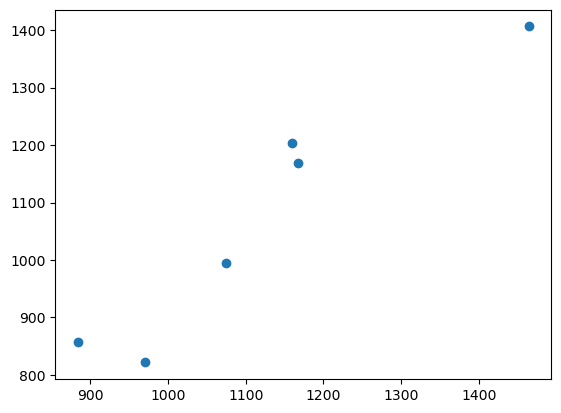

In [93]:
plt.scatter(y_test,y_pred)

In [95]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


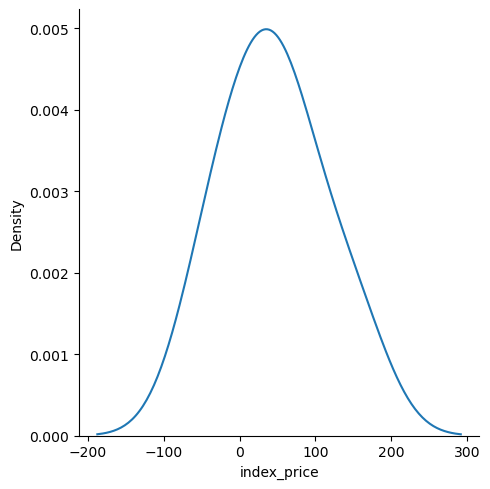

In [97]:
## Plot this residuals
sns.displot(residuals,kind='kde')

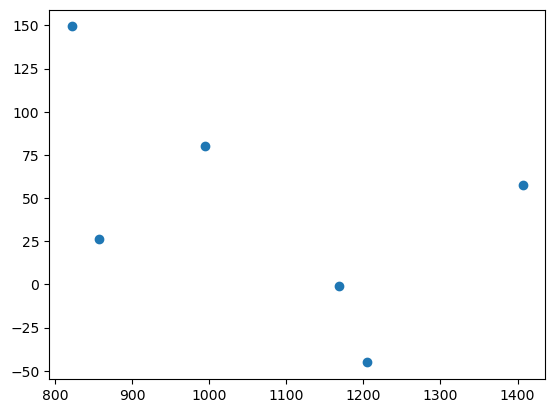

In [109]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals) # usually this will be scattered

In [111]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [113]:
model.summary()

C:\Users\GOPALAKRISHNAN\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 29 Dec 2024   Prob (F-statistic):                       0.754
Time:                        13:02:36   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
print(regression.coef_)

[  88.27275507 -116.25716066]
